In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #For Linear Regression
from sklearn.linear_model import SGDRegressor # For gradient descent
from sklearn.preprocessing import StandardScaler # For z-score Normalization


In [55]:
house_dataset=pd.read_csv("houses.txt")# Dataset

In [56]:
x=house_dataset.Size
y=house_dataset.Price
x_train=np.array(x).reshape(-1,1)#Reshaping in two dimensions
y_train=np.array(y).reshape(-1,1)#Reshaping

In [107]:
x_train

,Size,Number_of_Bedrooms,Number_of_floors,Age_of_Home
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


# Linear Regression Without Gradient Descent Using Sklearn

In [57]:
linear_regression=LinearRegression() # Calling the linear regression function from sklearn library
linear_regression.fit(x_train,y_train)#Passing the value of x_train and y_train in that function or fitting the value.

LinearRegression()

In [58]:
w=linear_regression.coef_# In Ml W is called coefficient
b=linear_regression.intercept_#In ml b is called intercept 


In [59]:
model_prediction=w*x_train+b# this is the normal we are predicting the value of y
model_prediction_sklearn=linear_regression.predict(x_train)



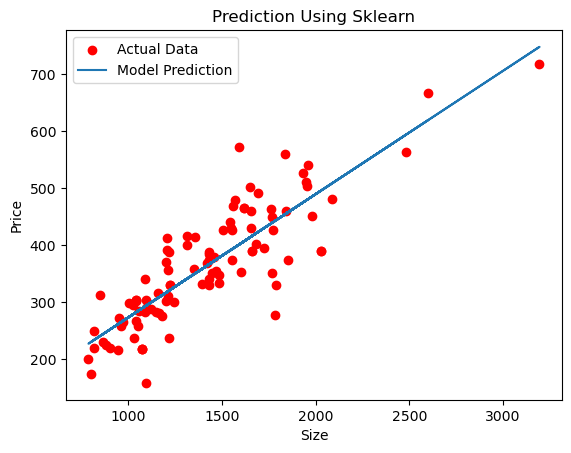

In [60]:
plt.scatter(x_train,y_train, c='r',label='Actual Data')
plt.plot(x_train,model_prediction,label='Model Prediction')
plt.title('Prediction Using Sklearn')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()


# Gradient Descent and Linear Regression Using Sklearn

In [137]:
x_features = house_dataset[['Size', 'Number_of_Bedrooms', 'Number_of_floors', 'Age_of_Home']]
x_train=x_features
y_train=house_dataset.Price


In [138]:
scaler = StandardScaler()#z-score normalization
X_norm = scaler.fit_transform(x_train)# Sending data to normalize

In [139]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()


In [169]:
w= sgdr.coef_
b= sgdr.intercept_


In [170]:
model_predictionn=sgdr.predict(X_norm)# Using Gradient Descent
mdl_predict=np.dot(X_norm,w)+b# Using Vectorization

In [171]:
model_predictionn,mdl_predict

(array([248.5571091 , 295.56457535, 485.88204891, 389.72858372,
        492.03131151, 420.36483631, 223.51595024, 523.11643592,
        267.97957062, 684.53916336, 182.61418793, 318.45446752,
        479.59146795, 409.95336281, 393.71637055, 287.52826105,
        323.8108213 , 406.08871463, 436.46340214, 270.26262897,
        500.63852058, 329.0091308 , 388.21847822, 551.66491461,
        242.17620353, 295.80331529, 283.02964383, 217.68977092,
        490.94613702, 229.61477739, 341.50439334, 291.74170958,
        490.00405713, 239.10312829, 597.98544441, 383.95670769,
        452.81643607, 401.47216248, 406.06455362, 173.20852912,
        423.66534949, 434.34925063, 277.47555497, 229.61477739,
        448.50456729, 488.95668021, 332.22031712, 465.64917417,
        222.3960903 , 386.78739533, 456.52902126, 370.66389093,
        468.86400814, 310.47655932, 426.58791779, 391.96908116,
        347.82987993, 339.61999156, 471.4268113 , 243.83870922,
        298.49103333, 273.3180828 , 250.

## Plotting Using Matplotlib

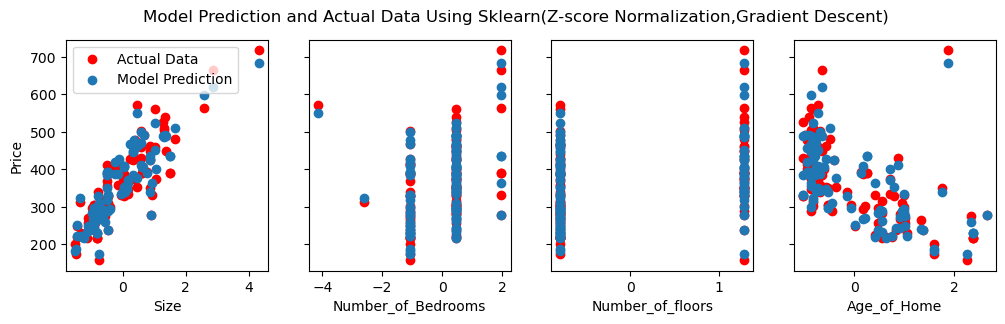

In [172]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i], y_train, label='Actual Data',c='r')
    
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:, i], model_predictionn, label='Model Prediction')

ax[0].set_ylabel("Price")
ax[0].legend()

fig.suptitle("Model Prediction and Actual Data Using Sklearn(Z-score Normalization,Gradient Descent)")
plt.show()
